# 기본 데이터 전처리 및 설정

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
def csi_index(cm):

     H = (cm[0][0] + cm[1][1] + cm[2][2])
     F = (cm[0][1] + cm[0][2] + 
          cm[1][0] + cm[1][2] + 
          cm[2][0] + cm[2][1] +
          cm[3][0] + cm[3][1] + cm[3][2])
     M = (cm[0][3] + cm[1][3] + cm[2][3])

     knn_csi = H / (H + F + M)
     return knn_csi

In [3]:
fog_train = pd.read_csv('/Users/yunkihun/data-science/weather-contest/weather-contest/kihun/fog_train.csv')
fog_test = pd.read_csv('/Users/yunkihun/data-science/weather-contest/weather-contest/kihun/fog_test.csv')

In [4]:
df = fog_train.drop(columns=[ 
                "Unnamed: 0",
                "fog_train.year", 
                "fog_train.month", 
                "fog_train.day",
                "fog_train.time",
                "fog_train.minute",
                "fog_train.vis1"
                ])

In [5]:
df = df.replace(-99.00, np.NaN)
df = df.replace(-99.90, np.NaN)

columns = df.columns
columns = [column.replace('fog_train.', "") for column in columns]
df.columns = columns

In [6]:
df = df.dropna()

In [7]:
def stn_transform(value):
    if value.startswith("A"):
        return 1
    elif value.startswith("B"):
        return 2
    elif value.startswith("C"):
        return 3
    elif value.startswith("D"):
        return 4
    elif value.startswith("E"):
        return 5
    
df["stn_id"] = df["stn_id"].apply(stn_transform)

In [8]:
df.shape

(2994850, 9)

In [9]:
df

,stn_id,ws10_deg,ws10_ms,ta,re,hm,sun10,ts,class
0,1,0.0,0.0,-6.4,0.0,38.9,0.0,-2.8,4.0
1,1,0.0,0.0,-6.3,0.0,37.9,0.0,-2.7,4.0
2,1,0.0,0.0,-6.3,0.0,40.0,0.0,-2.6,4.0
3,1,27.8,0.4,-6.2,0.0,39.5,0.0,-2.6,4.0
4,1,59.7,0.5,-6.1,0.0,39.8,0.0,-2.5,4.0
...,...,...,...,...,...,...,...,...,...
3156454,5,305.3,7.7,2.5,0.0,50.2,0.0,-0.9,4.0
3156455,5,293.8,5.7,2.3,0.0,50.1,0.0,-1.3,4.0
3156456,5,274.2,4.9,2.2,0.0,51.0,0.0,-1.4,4.0
3156457,5,270.3,4.6,2.1,0.0,51.7,0.0,-1.6,4.0


# 모델링

In [ ]:
# 로지스틱

In [17]:
from sklearn.linear_model import LogisticRegression

In [95]:
feature_columns = list(df.columns.difference(["class"]))
X = df[feature_columns]
y=df["class"]

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=42)

In [99]:
logistic_model = LogisticRegression(max_iter=200)
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)

/Users/yunkihun/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [103]:
# 정확도 출력
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# 분류 보고서 출력
print(classification_report(y_test, y_pred))

Accuracy: 0.99


/Users/yunkihun/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/yunkihun/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00      1951
         2.0       0.00      0.00      0.00      2994
         3.0       0.00      0.00      0.00      2985
         4.0       0.99      1.00      0.99    740783

    accuracy                           0.99    748713
   macro avg       0.25      0.25      0.25    748713
weighted avg       0.98      0.99      0.98    748713



/Users/yunkihun/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [130]:
cm = confusion_matrix(y_test, y_pred)

array([[     0,      0,      0,   1951],
       [     0,      0,      0,   2994],
       [     0,      0,      0,   2985],
       [     0,      3,      0, 740780]])

In [131]:
csi_index(cm)

0.0

In [150]:
# 풍향을 빼고 다시 해보자
df_nodeg = df.drop(columns=["ws10_deg"])

In [154]:
feature_columns = list(df_nodeg.columns.difference(["class"]))
X = df_nodeg[feature_columns]
y = df_nodeg["class"]

In [155]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=42)

In [156]:
logistic_model = LogisticRegression(max_iter=200)

In [157]:
logistic_model.fit(X_train, y_train)

/Users/yunkihun/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=200)

In [158]:
y_pred = logistic_model.predict(X_test)

In [159]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# 분류 보고서 출력
print(classification_report(y_test, y_pred))

Accuracy: 0.99


/Users/yunkihun/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/yunkihun/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00      1951
         2.0       0.00      0.00      0.00      2994
         3.0       0.00      0.00      0.00      2985
         4.0       0.99      1.00      0.99    740783

    accuracy                           0.99    748713
   macro avg       0.25      0.25      0.25    748713
weighted avg       0.98      0.99      0.98    748713



/Users/yunkihun/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [161]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[     0,      0,      0,   1951],
       [     0,      0,      0,   2994],
       [     0,      0,      0,   2985],
       [     0,      0,      0, 740783]])

In [162]:
csi_index(cm)

0.0

# 랜덤포레스트

In [10]:
from sklearn.ensemble import RandomForestClassifier

In [134]:
feature_columns = list(df.columns.difference(["class"]))
X = df[feature_columns]
y=df["class"]

In [135]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=42)

In [136]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [137]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [138]:
y_pred = rf_model.predict(X_test)

In [139]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.99


In [141]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.74      0.29      0.42      1951
         2.0       0.58      0.23      0.33      2994
         3.0       0.54      0.09      0.16      2985
         4.0       0.99      1.00      1.00    740783

    accuracy                           0.99    748713
   macro avg       0.71      0.40      0.48    748713
weighted avg       0.99      0.99      0.99    748713



In [143]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[   569,    179,      8,   1195],
       [   137,    688,    106,   2063],
       [    18,    144,    283,   2540],
       [    47,    172,    127, 740437]])

In [144]:
csi_index(cm)

0.1860802319961334

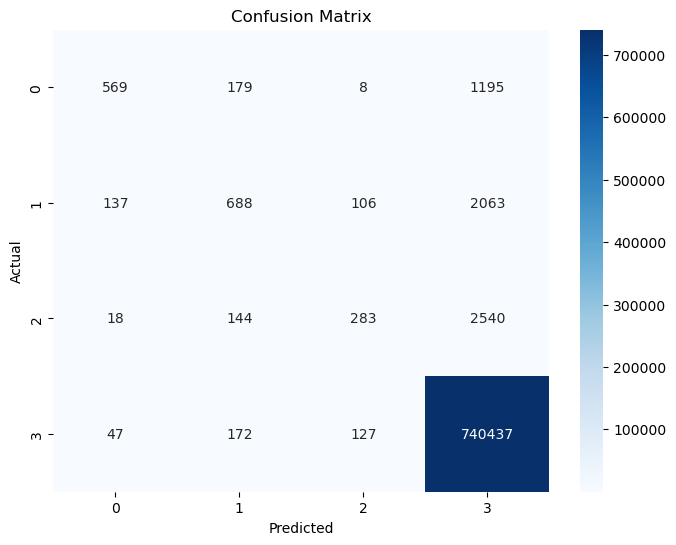

In [146]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [163]:
# 풍향을 빼보자
feature_columns = list(df_nodeg.columns.difference(["class"]))
X = df_nodeg[feature_columns]
y=df_nodeg["class"]

In [164]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [165]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [166]:
y_pred = rf_model.predict(X_test)

In [167]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.99


In [168]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.67      0.30      0.42      1951
         2.0       0.56      0.25      0.34      2994
         3.0       0.46      0.12      0.18      2985
         4.0       0.99      1.00      1.00    740783

    accuracy                           0.99    748713
   macro avg       0.67      0.42      0.48    748713
weighted avg       0.99      0.99      0.99    748713



In [169]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[   591,    195,     13,   1152],
       [   177,    735,    149,   1933],
       [    21,    182,    345,   2437],
       [    91,    208,    241, 740243]])

In [170]:
csi_index(cm)

0.19728453364817

# 과대표집 random forest

In [146]:
# SMOTE
from imblearn.over_sampling import SMOTE
from collections import Counter

In [26]:
#-----
!pip uninstall scikit-learn --yes
!pip uninstall imblearn --yes
!pip install scikit-learn==1.2.2
!pip install imblearn
#Restart anaconda navigator It should work

Found existing installation: scikit-learn 1.2.2
Uninstalling scikit-learn-1.2.2:
  Successfully uninstalled scikit-learn-1.2.2
Found existing installation: imblearn 0.0
Uninstalling imblearn-0.0:
  Successfully uninstalled imblearn-0.0
  Obtaining dependency information for scikit-learn==1.2.2 from https://files.pythonhosted.org/packages/2f/fd/9fcbe7fe94150e72d87120cbc462bde1971c3674e726b81f4a4c4fdfa8e1/scikit_learn-1.2.2-cp311-cp311-macosx_12_0_arm64.whl.metadata
  Using cached scikit_learn-1.2.2-cp311-cp311-macosx_12_0_arm64.whl.metadata (11 kB)
Using cached scikit_learn-1.2.2-cp311-cp311-macosx_12_0_arm64.whl (8.4 MB)
  Obtaining dependency information for imblearn from https://files.pythonhosted.org/packages/81/a7/4179e6ebfd654bd0eac0b9c06125b8b4c96a9d0a8ff9e9507eb2a26d2d7e/imblearn-0.0-py2.py3-none-any.whl.metadata
  Using cached imblearn-0.0-py2.py3-none-any.whl.metadata (355 bytes)
Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)


In [151]:
feature_columns = list(df.columns.difference(["class"]))
X = df[feature_columns]
y=df["class"]

In [152]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=42)

In [153]:
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train,y_train)
print('Resampled dataset shape :', Counter(y_res))

Resampled dataset shape : Counter({4.0: 2222346, 2.0: 2222346, 3.0: 2222346, 1.0: 2222346})


In [154]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model.fit(X_res, y_res)

RandomForestClassifier(random_state=42)

In [155]:
y_pred = rf_model.predict(X_test)

In [156]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.99


In [157]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.36      0.48      0.41      1951
         2.0       0.29      0.42      0.34      2994
         3.0       0.23      0.26      0.24      2985
         4.0       1.00      0.99      0.99    740783

    accuracy                           0.99    748713
   macro avg       0.47      0.54      0.50    748713
weighted avg       0.99      0.99      0.99    748713



In [158]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

csi_index(cm)

[[   934    395     83    539]
 [   334   1263    352   1045]
 [    92    431    790   1672]
 [  1241   2284   2244 735014]]


0.21804511278195488

In [13]:
# 데이터 불균형이 너무 심해서 smote의 연장선상에 있는 borderline smote난 adasyn 모두 사실상 같은 문제를 겪을 것으로 보임.
# 즉, 과대표집은 현재 별로 추천되는 방법이 아님

# 과소표집

In [11]:
df["class"].value_counts()

class
4.0    2963129
2.0      11975
3.0      11940
1.0       7806
Name: count, dtype: int64

In [13]:
# 최소 샘플 수 확인
min_class_count = df["class"].value_counts().min()

In [13]:
# 각 클래스별로 샘플링하여 과소표집 수행
df_under = df.groupby('class').apply(lambda X : X.sample(min_class_count, random_state=42).reset_index(drop=True))

In [14]:
print("\nUndersampled class distribution:")
print(df_under['class'].value_counts())


Undersampled class distribution:
class
1.0    7806
2.0    7806
3.0    7806
4.0    7806
Name: count, dtype: int64


In [15]:
# 이제 랜덤포레스트 적용
feature_columns = list(df_under.columns.difference(["class"]))
X = df_under[feature_columns]
y=df_under["class"]

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=42)

In [19]:
clf_under = RandomForestClassifier(n_estimators=100, random_state=42)
clf_under.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [20]:
y_pred = clf_under.predict(X_test)

In [21]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

Accuracy: 0.67
              precision    recall  f1-score   support

         1.0       0.66      0.70      0.68      1952
         2.0       0.53      0.54      0.53      1951
         3.0       0.63      0.58      0.60      1952
         4.0       0.86      0.86      0.86      1951

    accuracy                           0.67      7806
   macro avg       0.67      0.67      0.67      7806
weighted avg       0.67      0.67      0.67      7806



In [31]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
csi_index(cm)

[[1370  401  119   62]
 [ 445 1050  387   69]
 [ 209  472 1129  142]
 [  47   70  162 1672]]


0.5785784153896315

In [24]:
# feature importance 측정
importances = clf_under.feature_importances_
column_nm = pd.DataFrame(feature_columns)
feature_importances = pd.concat([column_nm, pd.DataFrame(importances)], axis=1)
feature_importances.columns=['feature_nm', 'importances']
print(feature_importances)

  feature_nm  importances
0         hm     0.264485
1         re     0.039664
2     stn_id     0.050132
3      sun10     0.071319
4         ta     0.161245
5         ts     0.162366
6   ws10_deg     0.143525
7    ws10_ms     0.107263


In [11]:
# 생각보다 풍향이 유의미한 지표로 나오는데.. 그래도 한번 빼고 다시 해보자
df_nodeg = df.drop(columns="ws10_deg")
feature_columns = list(df_nodeg.columns.difference(["class"]))
X = df_nodeg[feature_columns]
y=df_nodeg["class"]

In [14]:
df_under = df_nodeg.groupby('class').apply(lambda X : X.sample(min_class_count, random_state=42).reset_index(drop=True))

print("\nUndersampled class distribution:")
print(df_under['class'].value_counts())


Undersampled class distribution:
class
1.0    7806
2.0    7806
3.0    7806
4.0    7806
Name: count, dtype: int64


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=42)

In [16]:
clf_under = RandomForestClassifier(n_estimators=100, random_state=42)
clf_under.fit(X_train, y_train)
y_pred = clf_under.predict(X_test)

In [19]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

Accuracy: 0.99
              precision    recall  f1-score   support

         1.0       0.67      0.30      0.42      1951
         2.0       0.55      0.24      0.34      2994
         3.0       0.46      0.12      0.18      2985
         4.0       0.99      1.00      1.00    740783

    accuracy                           0.99    748713
   macro avg       0.67      0.41      0.48    748713
weighted avg       0.99      0.99      0.99    748713



In [20]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
csi_index(cm)

[[   590    190     16   1155]
 [   177    722    149   1946]
 [    23    183    344   2435]
 [    93    219    236 740235]]


0.19532908704883228

In [21]:
importances = clf_under.feature_importances_
column_nm = pd.DataFrame(feature_columns)
feature_importances = pd.concat([column_nm, pd.DataFrame(importances)], axis=1)
feature_importances.columns=['feature_nm', 'importances']
print(feature_importances)

  feature_nm  importances
0         hm     0.233618
1         re     0.006774
2     stn_id     0.035029
3      sun10     0.056987
4         ta     0.256813
5         ts     0.252550
6    ws10_ms     0.158229
